### <b> Bayes’ Theorem: P(a|b) = (P(b|a) * P(a)) / P(b) </b>

To implement the Naive Bayes Classification, we will use Iris Flower Dataset.<br><br>
It consists of 3 classes: iris-setosa, iris-versicolor and iris-virginica. <br><br>
There are 4 independent variables: sepal_length, sepal_width, petal_length and petal_width. <br><br>
The dependent variable is 'species' which we will predict using the four independent features of the flowers.<br><br>
Using the various features of the flower(independent variables), we have to classify a given flower using Naive Bayes Classification model.

### <b>Step 1: Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Datasets/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### <b> Step 2: Data Preprocessing

'ID' is an unwanted column. We will drop that column as it will cause issues in analysis process.

In [3]:
data = data.drop(['Id'], axis=1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### <b> Step 2: Visualizing Correlation

<AxesSubplot:>

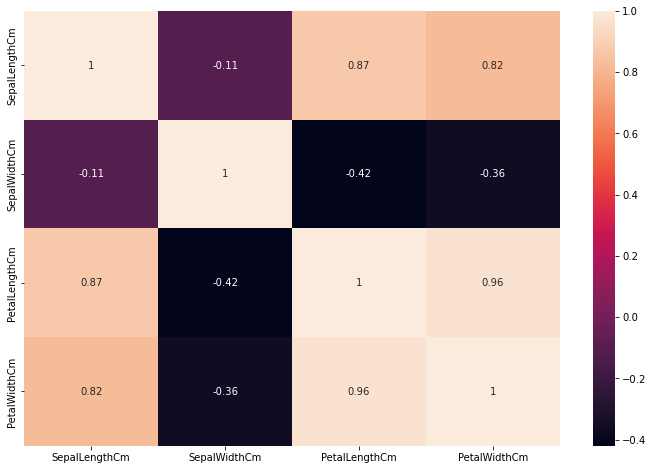

In [4]:
# To plot the correlation matrix, we use the heatmap function from seaborn.
# annot = True (for printing the values inside the square)
plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

We can see that features are highly correlated. <br>
But as per Naive's Bayes theorem, it will treat features as entirely indepedent to each other.<br>
Based on this, our algorithm will compute probability for all the three flower classes. 

### <b> Step 4: Splitting the data

Input data will have SepalLength, SepalWidth, PetalLength and PetalWidth columns. (Independent Variables)<br>
Output data will only have Species column. (Dependent Variable)

In [5]:
# Input data
x = data.drop(['Species'], axis=1)

# Output data
y = data['Species']

In [6]:
# Verifying the split
print(x)
print(y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-

#### <b>Splitting the dataset into Train and Test

In [7]:
# splitting the dataset into training and testing

from sklearn.model_selection import train_test_split

# split the training and testing dataset in 80%:20% ratio
# to ensure consistency assing any value to random_state
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=5)

# To know the shape of the train and test dataset
print("xtrain shape : ", xtrain.shape)
print("xtest shape  : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape  : ", ytest.shape)

xtrain shape :  (120, 4)
xtest shape  :  (30, 4)
ytrain shape :  (120,)
ytest shape  :  (30,)


### <b> Step 5: Training the model

We will use GaussianNB model from sklearn and fit our model in it

In [8]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

# Fitting GaussianNB model to training model
model.fit(xtrain, ytrain)

GaussianNB()

### <b> Step 6: Predicting the Test set results

Once the model is trained, we use the the model.predict() to predict the values for the Test set and the values predicted are stored to the variable ypred.

In [9]:
# Predicting the test set results
ypred = model.predict(xtest) 
ypred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
      dtype='<U15')

### <b> Step 7: Evaluating the model

Now we see the Accuracy of the trained model and plot the confusion matrix.<br>
The confusion matrix is a table that is used to show the number of correct and incorrect predictions on a classification problem when the real values of the Test Set are known.

In [10]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, ypred)
print ('Accuracy : ', accuracy)

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)

# print('Confusion Matrix: ''\n', cm) (Print Directly)
# OR make a dataframe
cm = pd.DataFrame(cm, index = ['setosa','versicolor','virgina'], columns = ['setosa','versicolor','virgina'])
print('Confusion Matrix: ''\n', cm)

Accuracy :  0.9
Confusion Matrix: 
             setosa  versicolor  virgina
setosa           8           0        0
versicolor       0          10        1
virgina          0           2        9


From the above confusion matrix, we infer that, out of 30 test set data, 27 were correctly classified and only 3 were incorrectly classified. This gives us a high accuracy of 90%.

### <b> Visualizing the Confusion Matrix

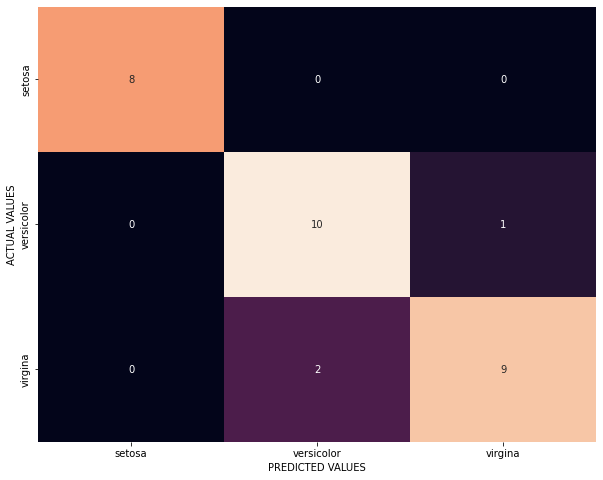

In [11]:
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cbar=False)
plt.ylabel('ACTUAL VALUES')
plt.xlabel('PREDICTED VALUES')
plt.show()

<b> From the above confusion matrix, we infer that, out of 30 test set data, 27 were correctly classified and only 3 were incorrectly classified.<br>
This gives us a high accuracy of 90%.

### <b> Step 8: Comparing the Real Values with Predicted Values

We create a dataframe of both testing and predicted.

In [12]:
df = pd.DataFrame({'Real Values':ytest, 'Predicted Values':ypred})
df.style.hide_index()

Real Values,Predicted Values
Iris-versicolor,Iris-versicolor
Iris-virginica,Iris-versicolor
Iris-virginica,Iris-virginica
Iris-setosa,Iris-setosa
Iris-virginica,Iris-virginica
Iris-versicolor,Iris-versicolor
Iris-setosa,Iris-setosa
Iris-versicolor,Iris-virginica
Iris-setosa,Iris-setosa
Iris-versicolor,Iris-versicolor
